## BUSINESS UNDERSTANDING

<font size='4'>This project aims to help Microsoft's new movie studio, to make a breakthrough in the film industry, by providing actionable insights on the types of films that are currently performing well at the box office. By understanding these trends, the head of the movie studio can make informed decisions about the type of films to create, which directors and writers to hire and  the project's insights will provide valuable information for assessing the profitability and market viability of the new movie studio. This knowledge will guide their resource allocation and investment decisions, ensuring that the studio has the necessary support and resources to thrive in the industry., maximizing their chances of success and capitalizing on high return of investment(ROI).</font>

## DATA UNDERSTANDING

<font size='4'>Data Source</font>

<font size='3'>The data was retrieved from different websites including rotten tomatoes and Box Office Mojo,this data has the correct features  and has the right amount of size needed for the project</font>

In [388]:
# importing neccessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [389]:
con = sqlite3.connect('Data/im.db')

In [390]:
# db schema
pd.read_sql(
"""
SELECT * FROM sqlite_master
""",con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [391]:
# reading the data in pandas 
bom = pd.read_csv("Data/bom.movie_gross.csv")
tmd = pd.read_csv("Data/tmdb.movies.csv")
tn = pd.read_csv("Data/tn.movie_budgets.csv")
rt = pd.read_csv("Data/rt.movie_info.tsv", sep="\t")
rt = pd.read_csv("Data/rt.reviews.tsv", sep="\t", encoding=("latin-1"))

In [392]:
#Getting Data size and info
combined = [bom,tmd,tn,rt,rt]
size = 0
for data in combined:
    print(data.info())
    print(data.sample(2))
    print(data.columns)
    size += data.size
print(f'The data has {size} rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
               title studio  domestic_gross foreign_gross  year
2691        We Are X  Drft.         45300.0           NaN  2016
2032  Kung Fu Killer  WGUSA        130000.0      10000000  2015
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         265

<font size='4'>Features</font>

<font size='3'>I will use the gross,budget,directors name,genre,release year,rating this will help me get the best genre,the best time to release the movie and the best rated directors with high return on investment

The wrong data type of the columns and NaN values in the dataset may limit the ease implication of the data 
</font>

In [393]:
#peaking through the data
print(bom.sample(2))
print(tmd.sample(2))
print(tn.sample(2))
print(rt.sample(2))
print(rt.sample(2))

         title   studio  domestic_gross foreign_gross  year
2770        It  WB (NL)     327500000.0     372900000  2017
398   Scream 4   W/Dim.      38200000.0      59000000  2011
       Unnamed: 0     genre_ids      id original_language  \
5000         5000  [16, 18, 14]  120872                en   
24723       24723          [27]  517166                en   

             original_title  popularity release_date                 title  \
5000   The Girl and the Fox       0.600   2011-04-09  The Girl and the Fox   
24723             The Axiom       5.023   2018-12-07             The Axiom   

       vote_average  vote_count  
5000            4.6           4  
24723           5.8           8  
      id  release_date                                      movie  \
4117  18  Sep 19, 1980                            Ordinary People   
5246  47  Sep 29, 2000  The Broken Hearts Club: A Romantic Comedy   

     production_budget domestic_gross worldwide_gross  
4117        $6,000,000    $52,302,9

In [394]:
pd.read_sql("""
SELECT * FROM movie_basics
""",con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


## DATA PREPARATION

In [395]:
# getting neccesary data from sql and joining them 
movies_sql = pd.read_sql(
    """
SELECT r.movie_id, a.title, r.averagerating AS rating, b.genres,b.runtime_minutes,p.primary_name AS director
FROM movie_ratings as r
LEFT JOIN movie_basics as b
USING (movie_id)
LEFT JOIN movie_akas as a
USING (movie_id)
LEFT JOIN directors as d
USING (movie_id)
LEFT JOIN persons as p
USING(person_id)
WHERE is_original_title = 1.0
ORDER BY rating DESC
""",
    con,
)
movies_sql

,movie_id,title,rating,genres,runtime_minutes,director
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary,52.0,Ivana Diniz
1,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary,52.0,Ivana Diniz
2,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,10.0,Documentary,59.0,Masahiro Hayakawa
3,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,10.0,Documentary,59.0,Michael J. Sanderson
4,tt5012400,"Pieces of Lives, Pieces of Dreams",9.8,Documentary,100.0,Hamid Benamra
...,...,...,...,...,...,...
93042,tt6017238,Priklyucheniya Volodi Zlogo,1.0,"Adventure,Comedy",76.0,Andrey Gromov
93043,tt4932436,Onna no ko yo shitai to odore,1.0,Comedy,70.0,Kayoko Asakura
93044,tt5880884,Bloody Massacre,1.0,"Drama,Horror,Thriller",82.0,Eldar Bogunov
93045,tt5880884,Bloody Massacre,1.0,"Drama,Horror,Thriller",82.0,Eldar Bogunov


In [396]:
#cheking for total nan values
movies_sql.isna().sum()

movie_id              0
title                 0
rating                0
genres              390
runtime_minutes    4586
director            137
dtype: int64

In [397]:
# droping nan rows
movies_sql.dropna(inplace=True)

In [398]:
movies_sql

,movie_id,title,rating,genres,runtime_minutes,director
0,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary,52.0,Ivana Diniz
1,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,10.0,Documentary,52.0,Ivana Diniz
2,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,10.0,Documentary,59.0,Masahiro Hayakawa
3,tt5390098,Atlas Mountain: Barbary Macaques - Childcaring...,10.0,Documentary,59.0,Michael J. Sanderson
4,tt5012400,"Pieces of Lives, Pieces of Dreams",9.8,Documentary,100.0,Hamid Benamra
...,...,...,...,...,...,...
93041,tt6017238,Priklyucheniya Volodi Zlogo,1.0,"Adventure,Comedy",76.0,Andrey Gromov
93042,tt6017238,Priklyucheniya Volodi Zlogo,1.0,"Adventure,Comedy",76.0,Andrey Gromov
93043,tt4932436,Onna no ko yo shitai to odore,1.0,Comedy,70.0,Kayoko Asakura
93044,tt5880884,Bloody Massacre,1.0,"Drama,Horror,Thriller",82.0,Eldar Bogunov


In [399]:
# renaming the movie column to title so that we can join it with movies_sql
tn.rename(columns={'movie':'title'},inplace=True)
tn.sample(2)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
2599,100,"Apr 12, 1985",Ladyhawke,"$20,000,000","$18,400,000","$18,400,000"
5354,55,"Oct 25, 2002",Time Changer,"$825,000","$1,500,711","$1,500,711"


In [400]:
# joining tn and movies_sql on title
df =pd.merge(movies_sql,tn,on='title',how='inner') # joining on rows found on both the records
df.drop_duplicates(inplace=True) # dropping duplicates rows

In [401]:
# checking for info and data type
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 5861
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2285 non-null   object 
 1   title              2285 non-null   object 
 2   rating             2285 non-null   float64
 3   genres             2285 non-null   object 
 4   runtime_minutes    2285 non-null   float64
 5   director           2285 non-null   object 
 6   id                 2285 non-null   int64  
 7   release_date       2285 non-null   object 
 8   production_budget  2285 non-null   object 
 9   domestic_gross     2285 non-null   object 
 10  worldwide_gross    2285 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 214.2+ KB


In [402]:
# changing data type of columns to appropriate dtype for arithmetic
df['release_date'] = pd.to_datetime(df['release_date']) # changing to date

#removing $ and , and changing it to int for arithemtic
df['domestic_gross'] = df['domestic_gross'].str.replace(r'[\$,]', '', regex=True).astype('int')  
df['worldwide_gross'] = df['worldwide_gross'].str.replace(r'[\$,]', '', regex=True).astype('int')
df['production_budget'] = df['production_budget'].str.replace(r'[\$,]', '', regex=True).astype('int')

In [403]:
#creating a total gross column
df['Total_gross'] = (df['domestic_gross'] + df['worldwide_gross'])
#creating a new column for ROI and use this get genres and managers to choose from and get High ROI
df['Profit'] = df['Total_gross'] - df['production_budget']

In [404]:
# normalizing the profit and budget for easier plotting
df['Profit'] = df['Profit'] / 1000000 # eg 500 million
df['production_budget'] = df['production_budget'] / 1000000

In [409]:
labels = ['Jan-Apr', 'May-Aug', 'Sep-Dec']

# Create a new column 'month_category' based on the categories
df['month_category'] = pd.cut(df['release_date'].dt.month, bins=[1, 4, 8, 12], labels=labels, right=False)


In [410]:
# droping empty rows in month category
genres_df1.dropna(inplace=True)

## DATA ANALYSIS

<font size='4'>Genre with highest ROI</font>

In [411]:
# a movie may have 2 or more genres in a movie hence let split and return a
#new column with list of genres
genres_df = df.assign(Genre=df["genres"].str.split(",")).explode("genres")

#exploding and creating a genre in each film 
genres_df = genres_df.explode('Genre')

# choosing the columns we want to work with
genres_df1 = genres_df[['Genre','production_budget','Profit','rating','runtime_minutes','month_category']]

In [412]:
#creating a new df grouped by individual genres and getting each's mean on profit and rating
genres_grp = genres_df1.groupby(["Genre"]).agg({"rating":"mean","Profit":["mean"],'production_budget':['mean'],'runtime_minutes':'mean'}).reset_index()

In [413]:
# sorting the top 10 genres with more profit compared to their budgets to emulate 
gen =genres_grp.sort_values([('Profit','mean'),('production_budget','mean')],ascending=[False,True])[:10]

In [ ]:
genr

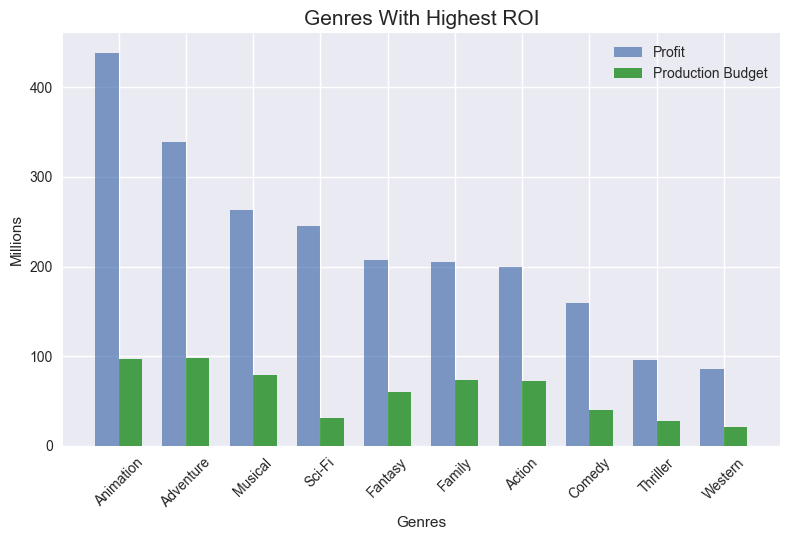

In [415]:
gene = gen[('Genre', '')].tolist()
profits = gen[('Profit', 'mean')].tolist()
budgets = gen[('production_budget', 'mean')].tolist()

# Create an array of indices  to be used instead of genres
gen_pos = np.arange(len(genres))

# Setting the width of each bar
bar_width = 0.35

# Create the bar chart for profit
fig, ax1 = plt.subplots()
ax1.bar(gen_pos, profits, width=bar_width, align='center', alpha=0.7, label='Profit')
ax1.set_ylabel('Millions')
ax1.set_xlabel('Genres')


ax1.bar(gen_pos + bar_width, budgets, width=bar_width, align='center', alpha=0.7, color='green',label='Production Budget')


# Setting the x_ticks for easier readibility
ax1.set_xticks(x_pos + bar_width / 2)
ax1.set_xticklabels(genres, rotation=45)

# Setting the title
ax1.set_title('Genres With Highest ROI',fontsize=15)


plt.tight_layout()
plt.legend(loc='best')
plt.show()

<font size='4'>

<Axes: title={'center': 'Best Time To Release A Movie'}, xlabel='month_category', ylabel='Profit'>

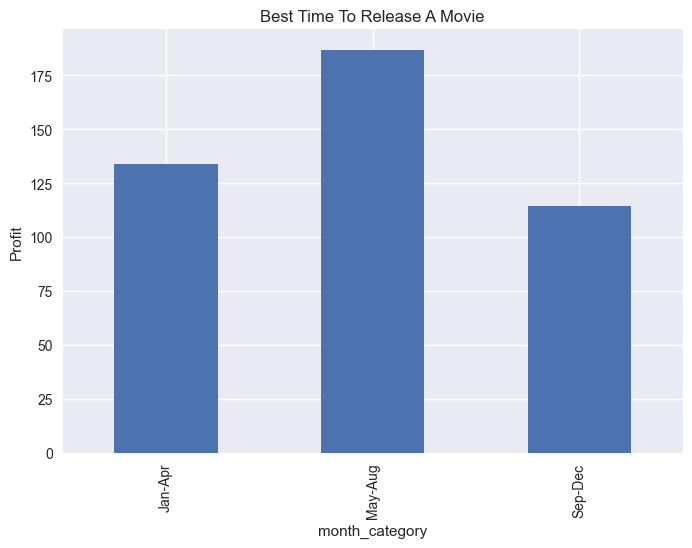

In [423]:
genres_df1.groupby('month_category').mean(numeric_only=True)['Profit'].plot(kind='bar',ylabel='Profit',title='Best Time To Release A Movie')

<font size='5'>Runtime</font>

Let try to get the average runtime for the best rated films 

In [ ]:
runtime_genre = ["Adventure", "Animation", "Sci-Fi",'Musical']

In [ ]:
runtime = genres_df[genres_df['Genre'].isin(runtime_genre)]

In [426]:
runtime.head()

,movie_id,title,rating,genres,runtime_minutes,director,id,release_date,production_budget,domestic_gross,worldwide_gross,Total_gross,Profit,Genre
0,tt1375666,Inception,8.8,"Action,Adventure,Sci-Fi",148.0,Christopher Nolan,38,2010-07-16,160.0,292576195,835524642,1128100837,968.100837,Adventure
0,tt1375666,Inception,8.8,"Action,Adventure,Sci-Fi",148.0,Christopher Nolan,38,2010-07-16,160.0,292576195,835524642,1128100837,968.100837,Sci-Fi
1,tt5797286,Yes,8.7,"Adventure,Biography,Documentary",80.0,Félix Rose,47,2005-06-24,1.7,396035,661221,1057256,-0.642744,Adventure
2,tt5797286,Yes,8.7,"Adventure,Biography,Documentary",80.0,Eric Piccoli,47,2005-06-24,1.7,396035,661221,1057256,-0.642744,Adventure
3,tt0816692,Interstellar,8.6,"Adventure,Drama,Sci-Fi",169.0,Christopher Nolan,32,2014-11-05,165.0,188017894,666379375,854397269,689.397269,Adventure


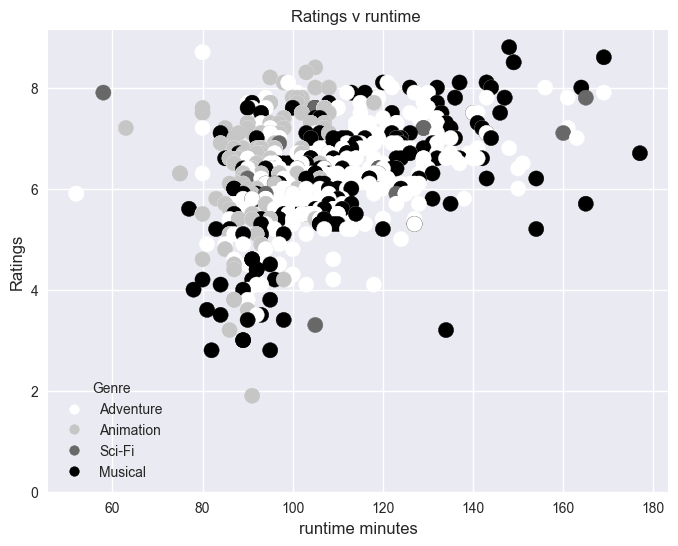

In [428]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(runtime["runtime_minutes"],runtime["rating"],s=120,c=runtime.Genre.astype('category').cat.codes)
plt.xlabel("runtime minutes", size=12)
plt.ylabel("Ratings", size=12)
plt.title("Ratings v runtime ")
plt.ylim(bottom=0)
# add legend to the plot with names
plt.legend(handles=scatter.legend_elements()[0], 
           labels=runtime_genre,
           title="Genre");